<a href="https://colab.research.google.com/github/Amithesh0107/AI-ML-/blob/main/DT_TITANIC_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [31]:
# Load the Titanic dataset (ensure the CSV is downloaded from Kaggle)
df = pd.read_csv('Titanic.csv')

# Drop irrelevant columns
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [32]:
# Display first few rows to understand the data
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [33]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [34]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [35]:
# Define features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier( random_state=42)

In [37]:
param_grid = {
    'max_depth': [6],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_clf = grid_search.best_estimator_
print("Test Accuracy after tuning:", best_clf.score(X_test, y_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Test Accuracy after tuning: 0.8212290502793296


In [38]:
# Retrieve the best estimator and evaluate it
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Accuracy Score
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8212290502793296


In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[94 11]
 [21 53]]


In [41]:
# Detailed Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



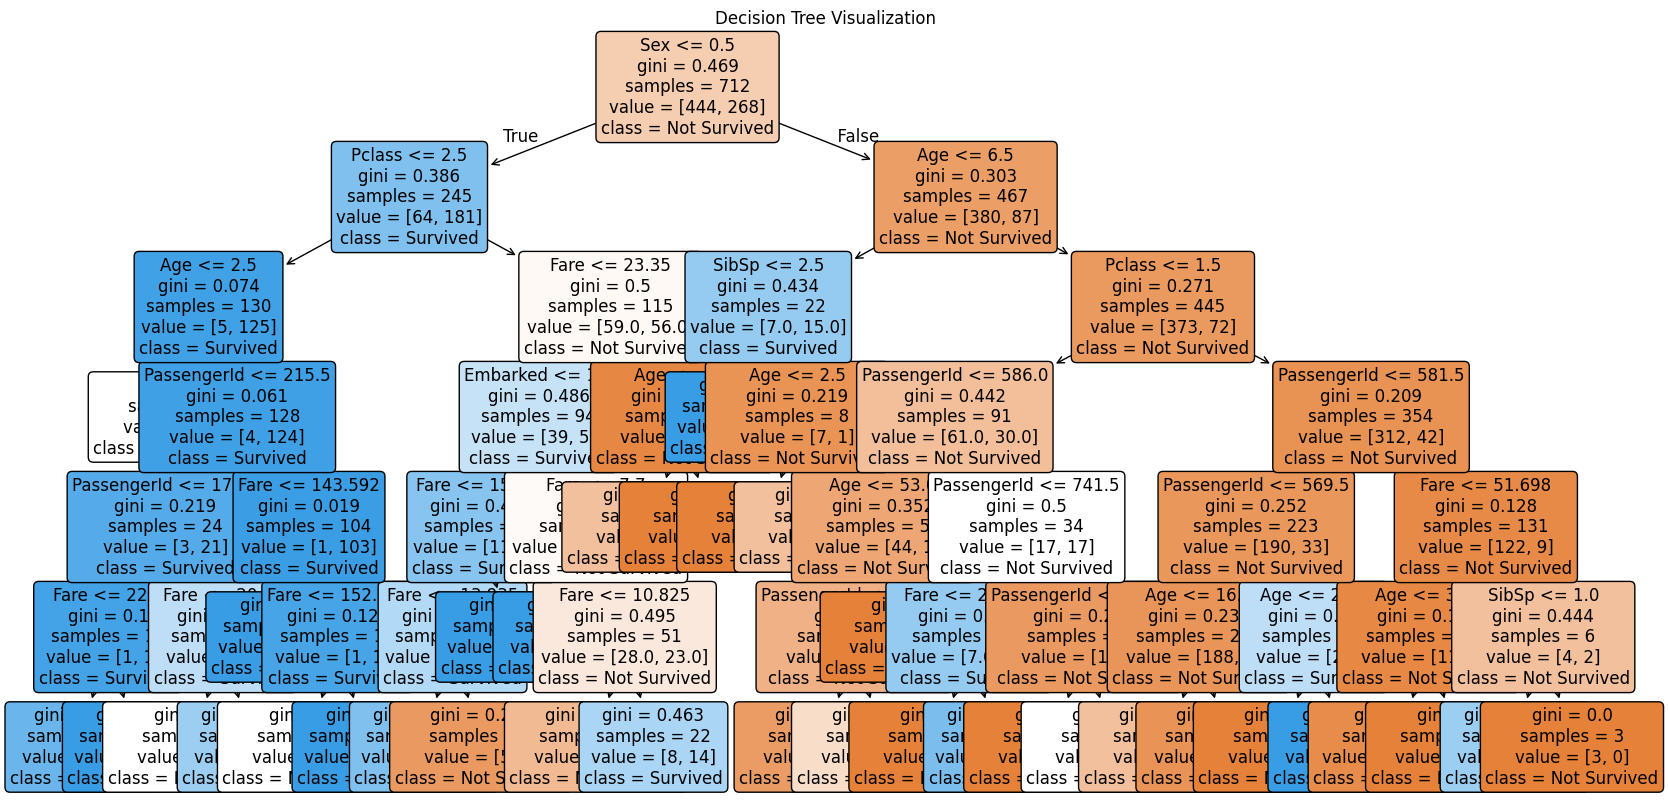

In [42]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf,
          feature_names=X.columns,         # use the actual feature names
          class_names=["Not Survived", "Survived"],  # adjust based on your classes
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

In [43]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [44]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [45]:
# Retrieve the best estimator and evaluate it
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Accuracy Score
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.7988826815642458
